<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Este taller guiado tiene como objetivo mostrar la implementación del algoritmo Redes Neuronales de Machine Learning usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Entrenar y evaluar un modelo de clasificación creado con una Red Neuronal Artifical (RNA) - Percepectrón Multicapa


## **1. Importar librería sklearn**

In [ ]:
# !pip install -U scikit-learn==1.0

In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import time
import joblib
from datetime import datetime


In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
NumPy 1.26.4
Pandas 2.1.4
Matplotlib 3.7.1
Scikit-learn 1.3.2


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 1.0

## **2. Cargar datos**

In [ ]:
from sklearn.datasets import make_classification

X,y = make_classification (n_samples=10000,
                           n_features=4,
                           n_classes=2,
                           random_state= 0,
                           shift=14,
                           scale = 40)

In [ ]:
X

array([[529.10234449, 574.4303041 , 464.75594698, 563.50279994],
       [605.97841398, 584.90183749, 574.92117576, 578.38631816],
       [483.64831337, 513.58949197, 549.05418206, 526.89358888],
       ...,
       [659.60142913, 678.91260416, 414.67100403, 632.88986466],
       [519.21774194, 519.53681125, 597.0118676 , 534.34089278],
       [495.04369661, 547.3125689 , 477.4149994 , 545.47039781]])

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print(X.shape)
print(y.shape)

(10000, 4)
(10000,)


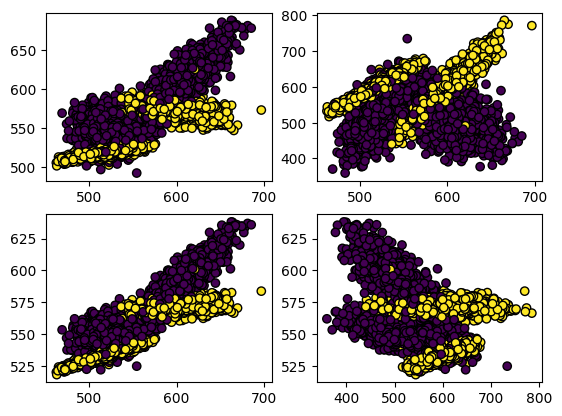

In [ ]:
fig, axes = plt.subplots(2,2)


axes[0,0].scatter(X[:,0], X[:,1],marker="o",c=y,edgecolors="k")
axes[0,1].scatter(X[:,0], X[:,2],marker="o",c=y,edgecolors="k")
axes[1,0].scatter(X[:,0], X[:,3],marker="o",c=y,edgecolors="k")
axes[1,1].scatter(X[:,2], X[:,3],marker="o",c=y,edgecolors="k")
plt.show()

## **3. Exploración**

In [ ]:
pd.DataFrame(X).describe() # Resumen estadístico de las variables numéricas, note que a partir de x,y y z se calcula el porcentaje depth

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,559.714252,559.981665,559.534219,559.955155
std,45.218317,34.497212,59.212988,22.230776
min,462.655415,492.624343,359.377165,518.381176
25%,519.481289,525.847695,517.086683,539.361258
50%,551.195134,561.759414,564.323968,560.002317
75%,599.907139,578.130891,602.415356,573.733996
max,696.876348,688.281978,785.504035,638.031689


In [ ]:
datos = pd.DataFrame(X)
datos['objetivo'] = y
datos

,0,1,2,3,objetivo
0,529.102344,574.430304,464.755947,563.502800,0
1,605.978414,584.901837,574.921176,578.386318,0
2,483.648313,513.589492,549.054182,526.893589,1
3,528.922122,572.573720,469.507260,562.535650,0
4,513.181178,560.884953,473.049281,554.631210,0
...,...,...,...,...,...
9995,501.485430,516.755990,572.600333,530.721883,1
9996,633.821888,576.692391,647.640431,577.669488,1
9997,659.601429,678.912604,414.671004,632.889865,0
9998,519.217742,519.536811,597.011868,534.340893,0


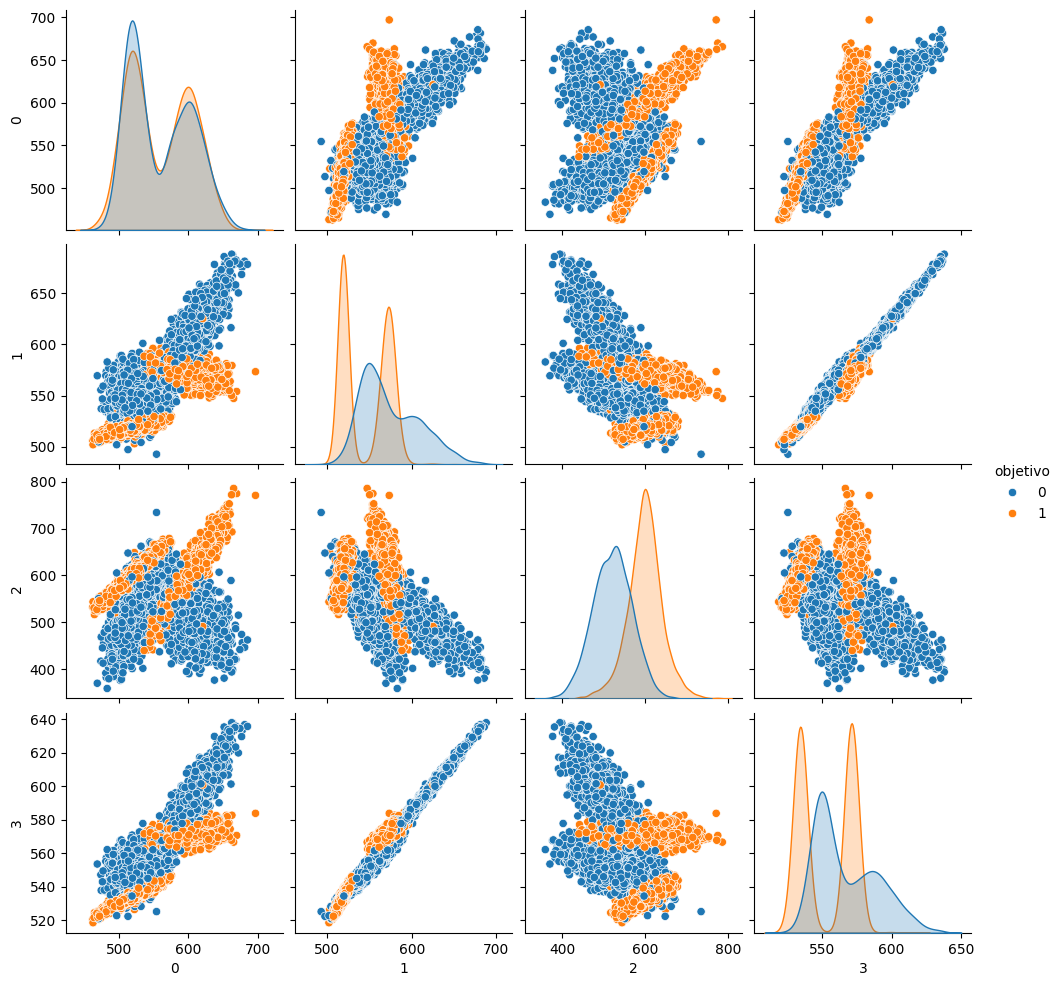

In [ ]:
sb.pairplot(data = datos, hue = 'objetivo')

## **4. Transformación de variables**

Para este dataset de juguete no tenemos ninguna variable predictora categórica. Entonces lo que haremos es hacer escalado de las variables numéricas para crear ``X_scale``

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
X_scale = sc.fit_transform(X)


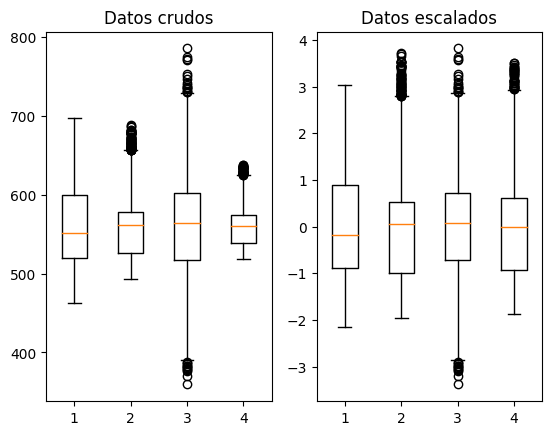

In [ ]:
fig, axes = plt.subplots(1,2)

axes[0].boxplot(X)
axes[0].set_title('Datos crudos')
axes[1].boxplot(X_scale)
axes[1].set_title('Datos escalados')

plt.show();

## **5. Partición del dataset en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scale,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 4  # Semilla aleatoria que sirve para reproducibilidad
)


In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (7000, 4)
Dimensiones de y de entrenamiento: (7000,)

Dimensiones de X de prueba: (3000, 4)
Dimensiones de y de prueba: (3000,)


## **6. Modelamiento**

In [ ]:
from sklearn.neural_network import MLPRegressor, MLPClassifier # MultiLayerPerceptron
# También puede utilizar redes neuronales para resolver problemas de regesión

# (4, 50,50,50 ,2)

inicio = datetime.now()
mlp = MLPClassifier(
        hidden_layer_sizes = (50,50,50), # Estructura, 3 capas ocultas, cada capa con 50 neuronas
        activation = 'logistic',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
)

%time mlp.fit(X_train,y_train)
fin = datetime.now()

print(fin - inicio)

CPU times: user 3.24 s, sys: 2.85 s, total: 6.09 s
Wall time: 6.12 s
0:00:06.122737


In [ ]:
# Exporta e importar modelos entrenados

from joblib import dump, load

dump(mlp, 'modelo_red_neuronal_harry.joblib')

['modelo_red_neuronal_harry.joblib']

In [ ]:
mlp = load('modelo_red_neuronal_harry.joblib')

In [ ]:
mlp.n_layers_

5

In [ ]:
mlp.n_iter_

24

Text(0, 0.5, 'Error')

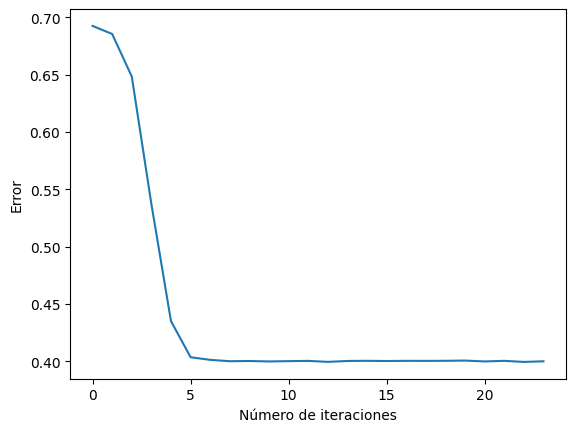

In [ ]:
x = mlp.loss_curve_

plt.plot(x)
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')

In [ ]:
mlp.coefs_

[array([[-0.23820543,  0.03934595, -0.16743226, -0.25736362,  0.22843846,
          0.21043272, -0.19821897,  0.27961369,  0.27826505,  0.32510394,
          0.36231442, -0.21381539,  0.35323865,  0.28255104,  0.13813218,
          0.32378842, -0.23868226, -0.36822532,  0.30586375, -0.35707551,
          0.13657972,  0.21819746, -0.14989455, -0.12954531, -0.16742009,
         -0.19642742,  0.28383132, -0.11885847,  0.23427159, -0.18265992,
          0.25671051,  0.16265104,  0.10489707, -0.25683006, -0.26503567,
         -0.32591579, -0.20828826, -0.35481417, -0.2472959 , -0.34639758,
          0.08805921,  0.27358649, -0.09907932,  0.201549  , -0.1458335 ,
          0.29362081,  0.10115114,  0.24415169,  0.28772399, -0.0629841 ],
        [ 0.34380971, -0.05708559,  0.30426666,  0.16088341, -0.2728209 ,
         -0.2700189 ,  0.27006979, -0.17703913, -0.1633265 , -0.27026586,
         -0.30049998,  0.15297926, -0.21047891, -0.09362772, -0.23800103,
         -0.26596896,  0.33592029, -0

In [ ]:
len(mlp.coefs_)

4

In [ ]:
mlp.coefs_[3].shape

(50, 1)

## **7. Evaluación del desempeño del modelo**

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_test = mlp.predict(X_test)

y_predict_train = mlp.predict(X_train)

### **Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_predict_test)
matrix

array([[1201,  277],
       [ 262, 1260]])

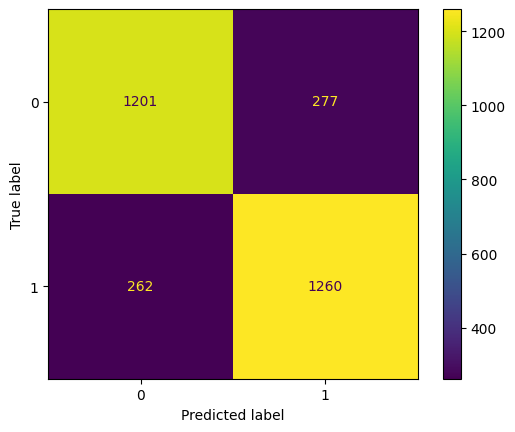

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(matrix)
disp.plot()

### **Exactitud**

In [ ]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_predict_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_test))

acc_train = accuracy_score(y_train, y_predict_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_train))

Exactitud en partición de prueba: 0.820333
Exactitud en partición de entrenamiento: 0.828429


### **Recall**

In [ ]:
from sklearn.metrics import recall_score

rec_test = recall_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(rec_test))

rec_train = recall_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(rec_train))

Recall en partición de prueba: 0.827858
Recall en partición de entrenamiento: 0.835294


### **Precisión**

In [ ]:
from sklearn.metrics import precision_score

prec_test = precision_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(prec_test))

prec_train = precision_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(prec_train))

Recall en partición de prueba: 0.819779
Recall en partición de entrenamiento: 0.822781


### **F1 score**

In [ ]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test,y_predict_test)
print('F1-score en partición de prueba: {:3f}'.format(f1_test))

f1_train = f1_score(y_train,y_predict_train)
print('F1-score en partición de prueba: {:3f}'.format(f1_train))

F1-score en partición de prueba: 0.823799
F1-score en partición de prueba: 0.828990


## **8. Busqueda de hiperparámetros**

Vamos a experimentar primero con los solver disponibles para entrenar el perceptrón multicapa. En este caso vamos a evaluar la exactitud, recuerde que según su interés le conviene usar una u otra métrica de evaluación.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm

accuracy = []
precision = []
tiempos = []

for solver in tqdm(('lbfgs','sgd','adam')):

  mlp = MLPClassifier(
        hidden_layer_sizes = (6,6,6),
        activation = 'relu',
        solver = solver,
        max_iter = 10000, # Aumentamos las iteraciones para que los solver puedan converger
        random_state = 40
        )
  inicio = datetime.now()
  mlp.fit(X_train,y_train)
  fin = datetime.now()
  tiempo = fin-inicio
  tiempo = tiempo.total_seconds()


  y_pred = mlp.predict(X_test)

  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))
  tiempos.append(tiempo)
  print('Se entrenó modelo')

 33%|███▎      | 1/3 [00:10<00:21, 10.83s/it]

Se entrenó modelo


 67%|██████▋   | 2/3 [00:17<00:08,  8.61s/it]

Se entrenó modelo


100%|██████████| 3/3 [00:21<00:00,  7.22s/it]

Se entrenó modelo


Para el uso de solver se puede apreciar que las diferencias tanto de exactitud y precisión son pequeñas. Una de las condiciones más importantes para usar uno u otro solver puede la cantidad de iteraciones necesarias para convergencia y así mismo el tiempo de convergencia.

In [ ]:
accuracy

[0.9096666666666666, 0.9073333333333333, 0.9103333333333333]

In [ ]:
precision

[0.9001919385796545, 0.88442521631644, 0.8879256965944272]

In [ ]:
tiempos

[10.812503, 7.046753, 3.751467]

Text(0, 0.5, 'Exactitud en prueba')

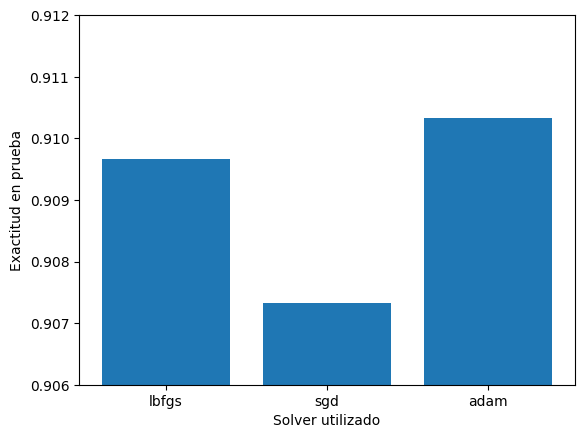

In [ ]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,accuracy)
plt.ylim((0.906,0.912))
plt.xlabel('Solver utilizado')
plt.ylabel('Exactitud en prueba')

Text(0, 0.5, 'Precision en prueba')

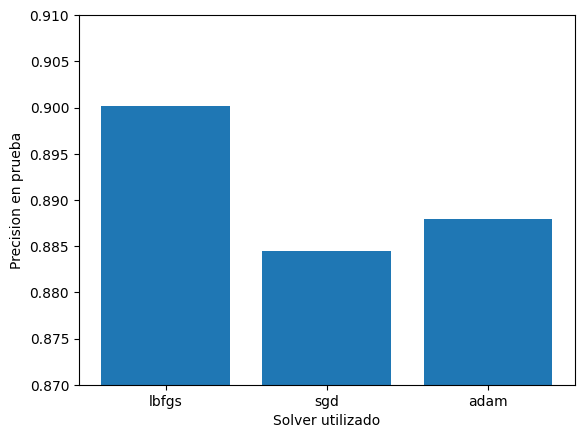

In [ ]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,precision)
plt.ylim((0.87,0.91))
plt.xlabel('Solver utilizado')
plt.ylabel('Precision en prueba')

Text(0, 0.5, 'Tiempo de entrenamiento')

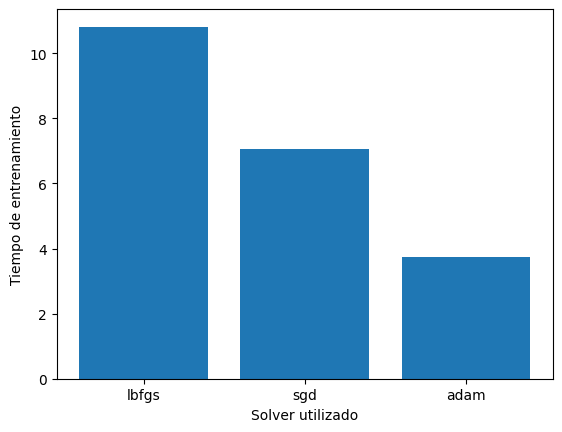

In [ ]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,tiempos)
plt.xlabel('Solver utilizado')
plt.ylabel('Tiempo de entrenamiento')

Ahora experimentemos con la cantidad de capas ocultas, en todos los casos vamos a dejar la misma cantidad de neuronas en cada capa.

In [ ]:
for capas in ((6),(6,6),(6,6,6),(6,6,6,6),(6,6,6,6,6)):
  print(capas)

6
(6, 6)
(6, 6, 6)
(6, 6, 6, 6)
(6, 6, 6, 6, 6)


In [ ]:
accuracy = []
precision = []
tiempos = []

for capas in tqdm(((6),(6,6),(6,6,6),(6,6,6,6),(6,6,6,6,6))):

  mlp = MLPClassifier(
        hidden_layer_sizes = capas,
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
        )
  inicio = datetime.now()
  mlp.fit(X_train,y_train)
  fin = datetime.now()
  tiempo = fin-inicio
  tiempo = tiempo.total_seconds()

  y_pred = mlp.predict(X_test)

  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))
  tiempos.append(tiempo)
  print('Se entreno modelo')

 20%|██        | 1/5 [00:04<00:17,  4.32s/it]

Se entreno modelo


 40%|████      | 2/5 [00:08<00:12,  4.12s/it]

Se entreno modelo


 60%|██████    | 3/5 [00:12<00:07,  4.00s/it]

Se entreno modelo


 80%|████████  | 4/5 [00:14<00:03,  3.29s/it]

Se entreno modelo


100%|██████████| 5/5 [00:21<00:00,  4.37s/it]

Se entreno modelo


In [ ]:
tiempos

[4.31301, 3.975997, 3.836738, 2.204594, 7.455122]

In [ ]:
precision

[0.8879746835443038,
 0.8946372239747634,
 0.8879256965944272,
 0.9007731958762887,
 0.8905472636815921]

Text(0, 0.5, 'Exactitud en prueba')

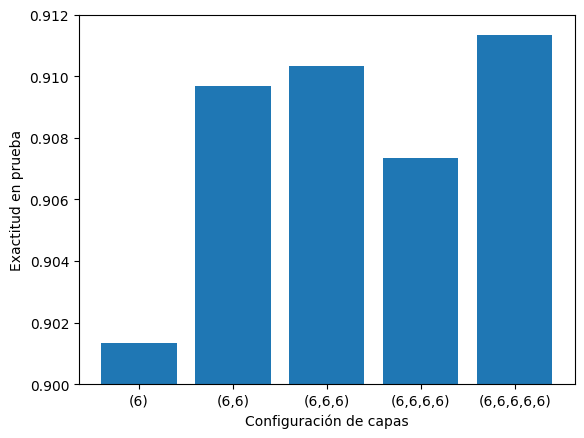

In [ ]:
capas =  ('(6)','(6,6)','(6,6,6)','(6,6,6,6)','(6,6,6,6,6)')

plt.bar(capas,accuracy)
plt.ylim((0.90,0.912))
plt.xlabel('Configuración de capas')
plt.ylabel('Exactitud en prueba')

Text(0, 0.5, 'Precision en prueba')

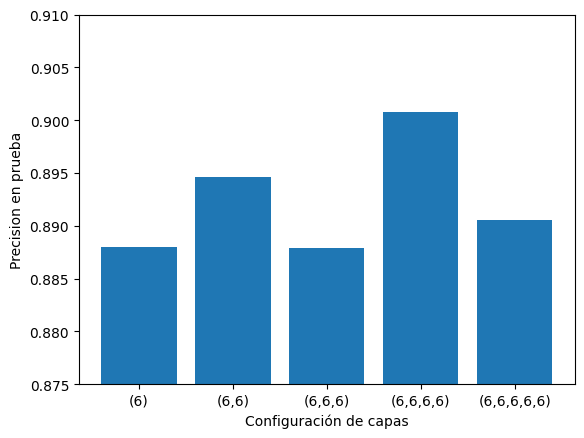

In [ ]:
plt.bar(capas,precision)
plt.ylim((0.875,0.91))
plt.xlabel('Configuración de capas')
plt.ylabel('Precision en prueba')

Text(0, 0.5, 'Tiempo de entrenamiento')

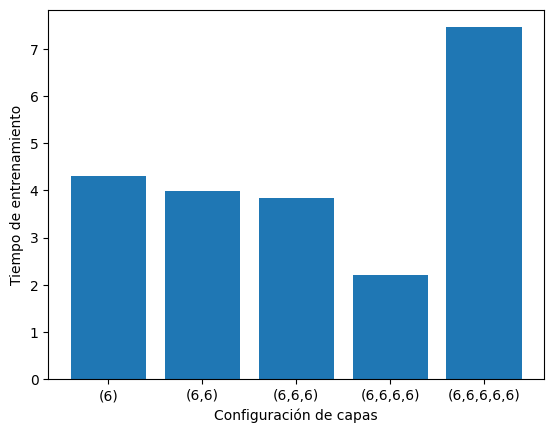

In [ ]:
capas =  ('(6)','(6,6)','(6,6,6)','(6,6,6,6)','(6,6,6,6,6)')

plt.bar(capas,tiempos)
plt.xlabel('Configuración de capas')
plt.ylabel('Tiempo de entrenamiento')

Tenga presente que usted puede experimentar con la cantidad de capas ocultas (1 a 3 en el experimento anterior) como con la cantidad de neuronas en cada capa oculta.

Otros hiperparámetros interesantes para experimentar pueden ser las funciones de activación disponibles

```
activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
```

In [ ]:
mlp_final = MLPClassifier(
        hidden_layer_sizes = (6,6,6,6,6),
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
        )

In [ ]:
hidden_layer_sizes = [(n1, n2, n3) for n1 in range(2, 101) for n2 in range(2, 101) for n3 in range(2, 101)]


In [ ]:
len(hidden_layer_sizes)

970299

## 9. Validación cruzada

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

param_dist = {
    'hidden_layer_sizes': [(n1, n2, n3) for n1 in range(2, 101) for n2 in range(2, 101) for n3 in range(2, 101)],
    'alpha': np.logspace(-5, 2, 100)
}

# Crea un clasificador MLP
mlp = MLPClassifier(random_state=42, solver = 'adam')

# Realiza la búsqueda aleatoria
random_search = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist,
    n_iter=3,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    scoring = ['accuracy','precision','recall'],
    refit = 'recall'
    )

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-05, 1.17681195e-05, 1.38488637e-05, 1.62975083e-05,
       1.91791026e-05, 2.25701972e-05, 2.65608778e-05, 3.12571585e-05,
       3.67837977e-05, 4.32876128e-05, 5.09413801e-05, 5.99484250e-05,
       7.05480231e-05, 8.30217568e-05, 9.77009957e-05, 1.149...
                                        'hidden_layer_sizes': [(2, 2, 2),
                                                               (2, 2, 3),
                                                               (2, 2, 4),
                                                               (2, 2, 5),
                                                               (2, 2, 6),
                                                               (2, 2, 7),
                                                               (2, 2, 8),
                                                               (2, 2, 9),
                                                               (2, 2, 10),
                                                               (2, 2, 11),
                                                               (2, 2, 12),
                                                               (2, 2, 13),
                                                               (2, 2, 14),
                                                               (2, 2, 15),
                                                               (2, 2, 16),
                                                               (2, 2, 17),
                                                               (2, 2, 18),
                                                               (2, 2, 19),
                                                               (2, 2, 20),
                                                               (2, 2, 21),
                                                               (2, 2, 22),
                                                               (2, 2, 23),
                                                               (2, 2, 24),
                                                               (2, 2, 25),
                                                               (2, 2, 26),
                                                               (2, 2, 27),
                                                               (2, 2, 28),
                                                               (2, 2, 29),
                                                               (2, 2, 30),
                                                               (2, 2, 31), ...]},
                   random_state=42, refit='recall',
                   scoring=['accuracy', 'precision', 'recall'], verbose=2)

In [ ]:
resultados = pd.DataFrame(random_search.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_alpha,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,9.004405,1.440314,0.017793,0.006847,"(70, 66, 32)",0.546228,"{'hidden_layer_sizes': (70, 66, 32), 'alpha': ...",0.923571,0.911429,0.912857,...,0.006776,3,0.964132,0.939742,0.949785,0.945481,0.946915,0.949211,0.008146,1
1,9.986143,1.904583,0.013905,0.000282,"(50, 75, 21)",0.126186,"{'hidden_layer_sizes': (50, 75, 21), 'alpha': ...",0.929286,0.914286,0.912857,...,0.011575,2,0.972740,0.955524,0.915352,0.941176,0.948350,0.946628,0.018825,2
2,10.483481,3.077743,0.019584,0.009999,"(63, 73, 52)",0.126186,"{'hidden_layer_sizes': (63, 73, 52), 'alpha': ...",0.930000,0.913571,0.916429,...,0.007820,1,0.968436,0.954089,0.934003,0.932568,0.939742,0.945768,0.013653,3


In [ ]:
# Imprime los mejores hiperparámetros y la exactitud del modelo correspondiente
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Mejores hiperparámetros: {'hidden_layer_sizes': (70, 66, 32), 'alpha': 0.5462277217684337}
Exactitud del modelo: 0.907


## **Recursos adicionales**

* Documentación

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html





## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*